In [944]:
import pandas as pd
import numpy as np

In [945]:
loan = pd.read_csv('loan.csv', low_memory=False)

# Data Analysis

In [946]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [947]:
loan.shape

(39717, 111)

In [948]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [949]:
loan.isnull().sum().sum()

2263364

In [950]:
loan.isna().sum().sum()

2263364

In [951]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

### 1. Handling null values

##### checking percentage of null values

In [952]:
(loan.isnull().sum().sum() / (loan.shape[0]*loan.shape[1]))

0.5133989643393677

##### 50% of the values are null so first checking and dropping columns with all null values

In [953]:
total_rows = loan.id.count()

In [954]:
for i in loan.columns:
    if loan[i].isna().sum() == total_rows:
        print ('{0} : {1}'.format(i, loan[i].isna().sum()))
        del loan[i]

mths_since_last_major_derog : 39717
annual_inc_joint : 39717
dti_joint : 39717
verification_status_joint : 39717
tot_coll_amt : 39717
tot_cur_bal : 39717
open_acc_6m : 39717
open_il_6m : 39717
open_il_12m : 39717
open_il_24m : 39717
mths_since_rcnt_il : 39717
total_bal_il : 39717
il_util : 39717
open_rv_12m : 39717
open_rv_24m : 39717
max_bal_bc : 39717
all_util : 39717
total_rev_hi_lim : 39717
inq_fi : 39717
total_cu_tl : 39717
inq_last_12m : 39717
acc_open_past_24mths : 39717
avg_cur_bal : 39717
bc_open_to_buy : 39717
bc_util : 39717
mo_sin_old_il_acct : 39717
mo_sin_old_rev_tl_op : 39717
mo_sin_rcnt_rev_tl_op : 39717
mo_sin_rcnt_tl : 39717
mort_acc : 39717
mths_since_recent_bc : 39717
mths_since_recent_bc_dlq : 39717
mths_since_recent_inq : 39717
mths_since_recent_revol_delinq : 39717
num_accts_ever_120_pd : 39717
num_actv_bc_tl : 39717
num_actv_rev_tl : 39717
num_bc_sats : 39717
num_bc_tl : 39717
num_il_tl : 39717
num_op_rev_tl : 39717
num_rev_accts : 39717
num_rev_tl_bal_gt_0 : 39

In [955]:
loan.shape

(39717, 57)

##### checking null values in remaining 57 columns

In [956]:
for i in loan.columns:
    print ('{0} : {1}'.format(i, loan[i].isna().sum()))

id : 0
member_id : 0
loan_amnt : 0
funded_amnt : 0
funded_amnt_inv : 0
term : 0
int_rate : 0
installment : 0
grade : 0
sub_grade : 0
emp_title : 2459
emp_length : 1075
home_ownership : 0
annual_inc : 0
verification_status : 0
issue_d : 0
loan_status : 0
pymnt_plan : 0
url : 0
desc : 12940
purpose : 0
title : 11
zip_code : 0
addr_state : 0
dti : 0
delinq_2yrs : 0
earliest_cr_line : 0
inq_last_6mths : 0
mths_since_last_delinq : 25682
mths_since_last_record : 36931
open_acc : 0
pub_rec : 0
revol_bal : 0
revol_util : 50
total_acc : 0
initial_list_status : 0
out_prncp : 0
out_prncp_inv : 0
total_pymnt : 0
total_pymnt_inv : 0
total_rec_prncp : 0
total_rec_int : 0
total_rec_late_fee : 0
recoveries : 0
collection_recovery_fee : 0
last_pymnt_d : 71
last_pymnt_amnt : 0
next_pymnt_d : 38577
last_credit_pull_d : 2
collections_12_mths_ex_med : 56
policy_code : 0
application_type : 0
acc_now_delinq : 0
chargeoff_within_12_mths : 56
delinq_amnt : 0
pub_rec_bankruptcies : 697
tax_liens : 39


##### checking percentage of null remaining

In [957]:
(loan.isnull().sum().sum() / (loan.shape[0]*loan.shape[1]))

0.05240850950297919

##### checking for duplicate rows

In [958]:
loan[loan.duplicated()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,chargeoff_within_12_mths,delinq_amnt,pub_rec_bankruptcies,tax_liens


### 2. Removing non-essential data

In [959]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'policy_code', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_

##### checking the number of unique values in each columns, if its one then its not required

In [960]:
loan.pymnt_plan.unique()

array(['n'], dtype=object)

In [961]:
del loan['pymnt_plan']

In [962]:
del loan['url']

In [963]:
loan.desc.isnull().sum()

12940

In [964]:
loan.id.count()

39717

##### checking percentage of null value

In [965]:
loan.desc.isnull().sum() / loan.id.count()

0.3258050708764509

In [966]:
del loan['desc']

In [967]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [968]:
loan.title.unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

#####  zip_code is not required as its has many unique values and it won't be helpful in univariate or bi-variate analysis

In [969]:
del loan['zip_code']

In [970]:
loan.addr_state.unique()

array(['AZ', 'GA', 'IL', 'CA', 'OR', 'NC', 'TX', 'VA', 'MO', 'CT', 'UT',
       'FL', 'NY', 'PA', 'MN', 'NJ', 'KY', 'OH', 'SC', 'RI', 'LA', 'MA',
       'WA', 'WI', 'AL', 'CO', 'KS', 'NV', 'AK', 'MD', 'WV', 'VT', 'MI',
       'DC', 'SD', 'NH', 'AR', 'NM', 'MT', 'HI', 'WY', 'OK', 'DE', 'MS',
       'TN', 'IA', 'NE', 'ID', 'IN', 'ME'], dtype=object)

In [971]:
loan.delinq_2yrs.unique()

array([ 0,  2,  3,  1,  4,  6,  5,  8,  7,  9, 11])

In [972]:
loan.mths_since_last_delinq.unique()

array([ nan,  35.,  38.,  61.,   8.,  20.,  18.,  68.,  45.,  48.,  41.,
        40.,  74.,  25.,  53.,  39.,  10.,  26.,  56.,  77.,  28.,  52.,
        24.,  16.,  60.,  54.,  23.,   9.,  11.,  13.,  65.,  19.,  80.,
        22.,  59.,  79.,  44.,  64.,  57.,  14.,  63.,  49.,  15.,  73.,
        70.,  29.,  51.,   5.,  75.,  55.,   2.,  30.,  47.,  33.,  69.,
         4.,  43.,  21.,  27.,  46.,  81.,  78.,  82.,  31.,  76.,  62.,
        72.,  42.,  50.,   3.,  12.,  67.,  36.,  34.,  58.,  17.,  71.,
        66.,  32.,   6.,  37.,   7.,   1.,  83.,  86., 115.,  96., 103.,
       120., 106.,  89., 107.,  85.,  97.,  95.,   0.])

In [973]:
loan.mths_since_last_delinq.isnull().sum() / loan.id.count()

0.6466248709620566

##### mths_since_last_delinq has more than 60 percent of its data as null its an non essential column

In [974]:
del loan['mths_since_last_delinq']

In [975]:
loan.mths_since_last_record.unique()

array([ nan, 113., 105.,  97.,  33.,  93.,  52.,  85.,  90.,  91., 114.,
        92., 117.,  87.,  45.,  83., 118.,  38., 101., 100., 112., 110.,
        88.,  79.,  77., 107., 102.,  98.,  95., 103.,  96., 116., 111.,
        89., 108.,  29., 106., 115.,  53.,  86.,  57.,  63.,  94., 109.,
        99., 104.,  76.,  61.,  28.,  23.,  75.,  47.,  82.,  21.,  62.,
        44.,  80.,  67., 119.,  42.,  34.,  66.,  58.,  22.,  56.,  72.,
        64.,  50.,  69.,  49.,  74.,  35.,  12.,  26.,  78.,  54.,  37.,
        73.,  11.,  31.,  59.,  32.,  81.,  68.,  55.,  39.,  51.,  70.,
        30.,  41.,  71.,  40.,  43.,  27.,  65.,  46.,  19.,  17.,  25.,
        13.,  48.,  36.,   7.,  60.,  14.,   6.,  18.,   0.,  20., 120.,
       129.,   5.])

In [976]:
loan.mths_since_last_record.isnull().sum() / loan.id.count()

0.9298537150338646

##### mths_since_last_record has 92 percent of its data as null, this column is not required

In [977]:
del loan ['mths_since_last_record']

In [978]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'policy_code', 'application_type',
       'acc_now_delinq', 'chargeoff_within_12_mths', 'delinq_amnt',
       'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')

In [979]:
loan.initial_list_status.unique()

array(['f'], dtype=object)

In [980]:
del loan['initial_list_status']

In [981]:
loan.out_prncp.unique()

array([   0.  ,  524.06, 1849.1 , ...,   19.12,   13.28,   79.24])

In [982]:
loan.shape

(39717, 50)

In [983]:
loan.next_pymnt_d.isnull().sum() / loan.id.count()

0.971296925749679

##### next_pymnt_d has 97 percent data as null, dropping the column

In [984]:
del loan['next_pymnt_d']

In [985]:
loan.collections_12_mths_ex_med.unique()

array([ 0., nan])

In [986]:
loan.collections_12_mths_ex_med.isnull().sum() / loan.id.count()

0.0014099755772087519

##### collections_12_mths_ex_med has 99 percent 0 values

In [987]:
loan[loan.collections_12_mths_ex_med == 0]['id'].count() / loan.id.count()

0.9985900244227912

In [988]:
del loan['collections_12_mths_ex_med']

In [989]:
loan.policy_code.unique()

array([1])

In [990]:
del loan['policy_code']

In [991]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'title', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'application_type', 'acc_now_delinq',
       'chargeoff_within_12_mths', 'delinq_amnt', 'pub_rec_bankruptcies',
       'tax_liens'],
      dtype='object')

In [992]:
loan.application_type.unique()

array(['INDIVIDUAL'], dtype=object)

##### application_type has one unique value only

In [993]:
del loan['application_type']

In [994]:
loan.acc_now_delinq.unique()

array([0])

##### acc_now_delinq has 0 as value 

In [995]:
del loan['acc_now_delinq']

In [996]:
loan.chargeoff_within_12_mths.unique()

array([ 0., nan])

##### chargeoff_within_12_mths has 0 and null

In [997]:
del loan['chargeoff_within_12_mths']

In [998]:
loan.delinq_amnt.unique()

array([0])

##### delinq_amnt has 0 only

In [999]:
del loan ['delinq_amnt']

In [1000]:
loan.tax_liens.unique()

array([ 0., nan])

In [1001]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies,tax_liens
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0,0.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0,0.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0,0.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0,0.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0,0.0


In [1002]:
loan.shape

(39717, 43)

In [1003]:
loan['tax_liens'].unique()

array([ 0., nan])

##### tax_liens has 0 and null only

In [1004]:
del loan['tax_liens']

In [1005]:
loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

In [1006]:
loan[loan['pub_rec_bankruptcies'] == 0.]['pub_rec_bankruptcies'].count()

37339

In [1007]:
loan[loan['pub_rec_bankruptcies'].isna()]['pub_rec_bankruptcies'].count()

0

In [1008]:
loan[loan['pub_rec_bankruptcies'].isna()].shape[0]/loan.id.count()

0.017549160309187503

In [1009]:
loan['pub_rec'].unique()

array([0, 1, 2, 3, 4])

In [1010]:
loan['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1011]:
loan.shape

(39717, 42)

In [1012]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 42 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [1013]:
loan.loan_status

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39717, dtype: object

In [1014]:
loan[['emp_title','title', 'addr_state']]

,emp_title,title,addr_state
0,NaN,Computer,AZ
1,Ryder,bike,GA
2,NaN,real estate business,IL
3,AIR RESOURCES BOARD,personel,CA
4,University Medical Group,Personal,OR
...,...,...,...
39712,FiSite Research,Home Improvement,CO
39713,"Squarewave Solutions, Ltd.",Retiring credit card debt,NC
39714,NaN,MBA Loan Consolidation,MA
39715,NaN,JAL Loan,MD


In [1015]:
loan['emp_title'].unique()

array([nan, 'Ryder', 'AIR RESOURCES BOARD', ..., 'FiSite Research',
       'Squarewave Solutions, Ltd.', 'Evergreen Center'], dtype=object)

##### emp_title has no significance in defaulter analysis

In [1016]:
del loan['emp_title']

In [1017]:
loan['title'].unique()

array(['Computer', 'bike', 'real estate business', ...,
       'Retiring credit card debt', 'MBA Loan Consolidation', 'JAL Loan'],
      dtype=object)

##### title has no significance in defaulter analysis

In [1018]:
del loan['title']

In [1019]:
loan.shape

(39717, 40)

### 3. Datatype conversion

In [1020]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_length               38642 non-null  object 
 11  home_ownership           39717 non-null  object 
 12  annual_inc               39717 non-null  float64
 13  verification_status      39717 non-null  object 
 14  issue_d               

In [1021]:
loan.last_credit_pull_d

0        May-16
1        Sep-13
2        May-16
3        Apr-16
4        May-16
          ...  
39712    Jun-10
39713    Jul-10
39714    Jun-07
39715    Jun-07
39716    Jun-10
Name: last_credit_pull_d, Length: 39717, dtype: object

In [1022]:
str(loan['last_credit_pull_d'].dtypes)

'object'

##### printing all the object data type columns

In [1023]:
obj_var = ''
for i in loan.columns:
    if str(loan[i].dtypes) == 'object':
        print(i)
        obj_var = obj_var + ',' +i

term
int_rate
grade
sub_grade
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
addr_state
earliest_cr_line
revol_util
last_pymnt_d
last_credit_pull_d


In [1024]:
loan.int_rate

0        10.65%
1        15.27%
2        15.96%
3        13.49%
4        12.69%
          ...  
39712     8.07%
39713    10.28%
39714     8.07%
39715     7.43%
39716    13.75%
Name: int_rate, Length: 39717, dtype: object

##### converting int_rate from object to float and removing '%' sign

In [1025]:
loan.int_rate = loan.int_rate.apply(lambda x: float(x.replace('%','')))

In [1026]:
loan.int_rate

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [1027]:
loan.grade

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

##### converting grade data type from object to string

In [1028]:
loan.grade.apply(lambda x: str(x))

0        B
1        C
2        C
3        C
4        B
        ..
39712    A
39713    C
39714    A
39715    A
39716    E
Name: grade, Length: 39717, dtype: object

In [1029]:
loan.grade.unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [1030]:
loan.grade.apply(lambda x: str(x.replace("'",''))).unique()

array(['B', 'C', 'A', 'E', 'F', 'D', 'G'], dtype=object)

In [1031]:
loan.grade = loan.grade.apply(lambda x: 1 if x == 'A' 
                 else (2 if x == 'B' 
                       else (3 if x == 'C' 
                             else (4 if x == 'D' 
                                   else(5 if x == 'E' 
                                        else(6 if x =='F' else 7))))))

In [1032]:
for i in loan.columns:
    if str(loan[i].dtypes) == 'object':
        print(i)

term
sub_grade
emp_length
home_ownership
verification_status
issue_d
loan_status
purpose
addr_state
earliest_cr_line
revol_util
last_pymnt_d
last_credit_pull_d


##### sub_grade has alpha numeric, so leaving as is

In [1033]:
loan.sub_grade.unique()

array(['B2', 'C4', 'C5', 'C1', 'B5', 'A4', 'E1', 'F2', 'C3', 'B1', 'D1',
       'A1', 'B3', 'B4', 'C2', 'D2', 'A3', 'A5', 'D5', 'A2', 'E4', 'D3',
       'D4', 'F3', 'E3', 'F4', 'F1', 'E5', 'G4', 'E2', 'G3', 'G2', 'G1',
       'F5', 'G5'], dtype=object)

##### converting emp_length to numeric by converting it to years only

In [1034]:
loan.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [1035]:
loan[loan.emp_length.isnull()]

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
168,1067644,1302032,2500,2500,2500.00000,36 months,7.51,77.78,1,A3,...,1838.88,1575.06,253.74,0.00,10.08,0.0000,Dec-13,77.78,May-16,0.0
323,1058717,1290516,18000,18000,18000.00000,60 months,17.58,452.98,4,D4,...,26378.55,18000.00,8378.55,0.00,0.00,0.0000,Sep-15,6909.59,Sep-15,0.0
394,1064582,1298394,4000,4000,4000.00000,36 months,11.71,132.31,2,B3,...,4186.02,4000.00,186.02,0.00,0.00,0.0000,May-12,3658.15,May-12,0.0
422,1064366,1298164,1000,1000,1000.00000,36 months,14.65,34.50,3,C3,...,91.31,22.24,12.18,0.00,56.89,10.2402,Jan-12,34.50,Jun-12,1.0
439,1063912,1296491,8250,8250,8250.00000,36 months,7.51,256.67,1,A3,...,9239.89,8250.00,989.89,0.00,0.00,0.0000,Dec-14,278.92,Dec-14,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32591,480410,610728,10000,10000,9975.00000,36 months,14.22,342.85,3,C5,...,10431.80,10000.00,457.94,0.00,0.00,0.0000,Jun-10,9431.97,Jul-10,0.0
32608,480216,610335,3700,3700,3700.00000,36 months,14.22,126.86,3,C5,...,4566.72,3700.00,866.72,0.00,0.00,0.0000,Feb-13,132.70,Apr-16,0.0
32621,479954,609955,10000,10000,9731.17513,36 months,14.22,342.85,3,C5,...,7431.53,5591.87,1938.07,0.00,12.43,4.3000,Dec-11,342.85,Apr-16,0.0
32631,479836,609803,6000,6000,6000.00000,36 months,12.73,201.40,3,C1,...,7250.83,6000.00,1250.83,0.00,0.00,0.0000,Feb-13,222.95,Feb-13,0.0


In [1036]:
loan.loc[168]

id                                    1067644
member_id                             1302032
loan_amnt                                2500
funded_amnt                              2500
funded_amnt_inv                        2500.0
term                                36 months
int_rate                                 7.51
installment                             77.78
grade                                       1
sub_grade                                  A3
emp_length                                NaN
home_ownership                            OWN
annual_inc                            12000.0
verification_status           Source Verified
issue_d                                Dec-11
loan_status                       Charged Off
purpose                    debt_consolidation
addr_state                                 CA
dti                                      16.3
delinq_2yrs                                 0
earliest_cr_line                       Aug-94
inq_last_6mths                    

In [1037]:
loan.loc[169]

id                                 1062288
member_id                          1294350
loan_amnt                            13500
funded_amnt                          13500
funded_amnt_inv                    13500.0
term                             36 months
int_rate                              9.91
installment                         435.04
grade                                    2
sub_grade                               B1
emp_length                         2 years
home_ownership                    MORTGAGE
annual_inc                         36000.0
verification_status        Source Verified
issue_d                             Dec-11
loan_status                     Fully Paid
purpose                        credit_card
addr_state                              DC
dti                                  22.93
delinq_2yrs                              0
earliest_cr_line                    Apr-80
inq_last_6mths                           1
open_acc                                13
pub_rec    

In [1038]:
loan.emp_length.isnull().sum() / loan.emp_length.count()

0.02781947104187154

In [1039]:
loan.emp_length.isnull().sum()

1075

##### converting alpha numeric datatype emp_length to numeric

In [1040]:
loan.emp_length = loan.emp_length.apply(lambda x: int(0) if x == "< 1 year" 
                      else (1 if x=='1 year' 
                            else (2 if x=='2 years' 
                                  else (3 if x=='3 years' 
                                        else (4 if x=='4 years' 
                                              else (5 if x=='5 years' 
                                                    else(6 if x=='6 years' 
                                                         else (7 if x=='7 years' 
                                                               else(8 if x=='8 years' 
                                                                    else(9 if x=='9 years' 
                                                                         else(10 if x=='10+ years' else x) ))))))))))


In [1041]:
loan.emp_length.dtype

dtype('float64')

##### term has two unique values, removing months from its values

In [1042]:
loan.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

In [1043]:
loan.term = loan.term.apply(lambda x: x.replace('months',''))

In [1044]:
loan.term.dtype

dtype('O')

In [1045]:
loan.term.str.strip().astype('int32')

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 39717, dtype: int32

In [1046]:
loan.term = loan.term.str.strip().astype('int32')

In [1047]:
loan.term.dtype

dtype('int32')

In [1048]:
loan.term.unique()

array([36, 60], dtype=int32)

In [1049]:
for i in loan.columns:
    if str(loan[i].dtypes) == 'object':
        print(i)

sub_grade
home_ownership
verification_status
issue_d
loan_status
purpose
addr_state
earliest_cr_line
revol_util
last_pymnt_d
last_credit_pull_d


In [1050]:
loan.home_ownership.unique()

array(['RENT', 'OWN', 'MORTGAGE', 'OTHER', 'NONE'], dtype=object)

In [1051]:
loan.verification_status.unique()

array(['Verified', 'Source Verified', 'Not Verified'], dtype=object)

In [1052]:
loan.issue_d.unique()

array(['Dec-11', 'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11',
       'Jun-11', 'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11',
       'Dec-10', 'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10',
       'Jun-10', 'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09',
       'Jun-09', 'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09',
       'Dec-08', 'Nov-08', 'Oct-08', 'Sep-08', 'Aug-08', 'Jul-08',
       'Jun-08', 'May-08', 'Apr-08', 'Mar-08', 'Feb-08', 'Jan-08',
       'Dec-07', 'Nov-07', 'Oct-07', 'Sep-07', 'Aug-07', 'Jul-07',
       'Jun-07'], dtype=object)

##### converting issue_d to datetime format

In [1053]:
import datetime
import pytz

In [1054]:
loan.issue_d[0]

'Dec-11'

In [1055]:
datetime.datetime.strptime(loan.issue_d[0], '%b-%y').year

2011

In [1056]:
datetime.datetime.strptime(loan.issue_d[0], '%b-%y').month

12

##### creating new columns (issue_year and issue_month) from issue_d

In [1057]:
loan['issue_year'] = loan.issue_d.apply(lambda x: datetime.datetime.strptime(x, '%b-%y').year)


In [1058]:
loan['issue_month'] = loan.issue_d.apply(lambda x: datetime.datetime.strptime(x, '%b-%y').month)


In [1059]:
loan.shape

(39717, 42)

In [1060]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [1061]:
loan.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [1063]:
loan.revol_util.unique()

array(['83.70%', '9.40%', '98.50%', ..., '49.63%', '0.04%', '7.28%'],
      dtype=object)

In [1064]:
loan.last_pymnt_d.unique()

array(['Jan-15', 'Apr-13', 'Jun-14', 'May-16', 'Apr-12', 'Nov-12',
       'Jun-13', 'Sep-13', 'Jul-12', 'Oct-13', 'May-13', 'Feb-15',
       'Aug-15', 'Oct-12', 'Sep-12', nan, 'Dec-12', 'Dec-14', 'Aug-13',
       'Nov-13', 'Jan-14', 'Apr-14', 'Aug-14', 'Oct-14', 'Aug-12',
       'Jul-14', 'Jul-13', 'Jan-16', 'Feb-16', 'Apr-15', 'Feb-14',
       'Sep-14', 'Jun-12', 'Feb-13', 'Mar-13', 'May-14', 'Mar-15',
       'Jan-13', 'Dec-13', 'Feb-12', 'Mar-14', 'Sep-15', 'Nov-15',
       'Mar-16', 'Jan-12', 'Oct-15', 'Nov-14', 'Mar-12', 'May-12',
       'Apr-16', 'Dec-15', 'Jun-15', 'May-15', 'Jul-15', 'Dec-11',
       'Nov-11', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Mar-10', 'Feb-10', 'Jan-10', 'Dec-09',
       'Nov-09', 'Oct-09', 'Sep-09', 'Aug-09', 'Jul-09', 'Jun-09',
       'May-09', 'Apr-09', 'Mar-09', 'Feb-09', 'Jan-09', 

In [1065]:
loan.last_credit_pull_d.unique()

array(['May-16', 'Sep-13', 'Apr-16', 'Jan-16', 'Dec-14', 'Aug-12',
       'Mar-13', 'Dec-15', 'Aug-13', 'Nov-12', 'Mar-14', 'Apr-15',
       'May-14', 'Jul-15', 'Feb-16', 'Mar-16', 'Sep-12', 'May-13',
       'Jan-15', 'Jun-12', 'Mar-15', 'Dec-12', 'Sep-14', 'Feb-14',
       'Jun-15', 'Oct-13', 'Apr-14', 'Oct-14', 'Feb-13', 'Nov-15',
       'Jul-14', 'Sep-15', 'Oct-12', 'Nov-13', 'Nov-14', 'Feb-12',
       'Oct-15', 'Apr-12', 'Aug-15', 'Jun-14', 'Jan-12', 'Aug-14',
       'Jun-13', 'Dec-13', 'May-12', 'Jul-12', 'Jan-14', 'Jul-13',
       'Apr-13', 'May-15', 'Feb-15', 'Mar-12', 'Nov-11', 'Dec-11',
       'Jan-13', 'Oct-11', 'Sep-11', 'Aug-11', 'Jul-11', 'Jun-11',
       'May-11', 'Apr-11', 'Mar-11', 'Feb-11', 'Jan-11', 'Dec-10',
       'Nov-10', 'Oct-10', nan, 'Sep-10', 'Aug-10', 'Jul-10', 'Jun-10',
       'May-10', 'Apr-10', 'Feb-10', 'Mar-10', 'Aug-07', 'Jan-10',
       'Dec-09', 'Nov-09', 'Oct-09', 'Sep-09', 'Jul-09', 'Aug-09',
       'May-09', 'Jun-09', 'Apr-09', 'Mar-09', 'Feb-09', 

# Sanity checks

In [1066]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

In [1067]:
loan.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

##### as we are trying to analyse the patter of defaulters, the customers with Current status won't be helpful. We can remove Current customers and compare only fully paid and charged off customers.

In [1068]:
loan = loan[~(loan.loan_status == 'Current')]

In [1069]:
loan.shape

(38577, 42)

# Handling outliers

In [1070]:
import matplotlib.pyplot as plt
%matplotlib inline

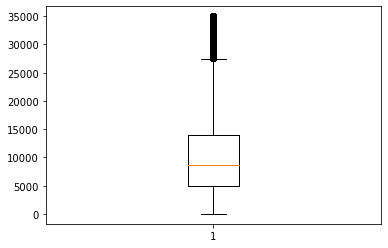

In [1071]:
plt.boxplot(loan.funded_amnt_inv)
plt.show()

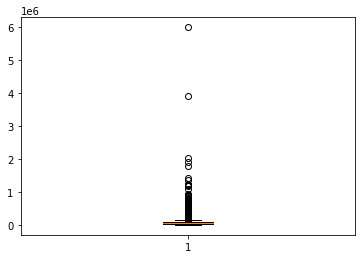

In [1072]:
plt.boxplot(loan.annual_inc)
plt.show()

In [1073]:
loan.annual_inc.describe()

count    3.857700e+04
mean     6.877797e+04
std      6.421868e+04
min      4.000000e+03
25%      4.000000e+04
50%      5.886800e+04
75%      8.200000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

In [1074]:
loan.annual_inc.max()

6000000.0

<AxesSubplot:>

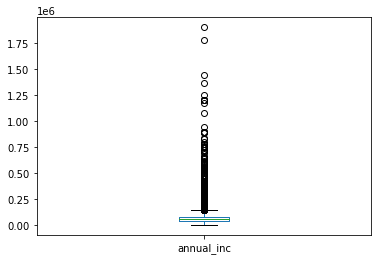

In [1075]:
loan[loan.annual_inc < 2000000].annual_inc.plot.box()

In [1076]:
loan[(loan.annual_inc > 500000.0 )].id.count()

66

In [1077]:
loan[(loan.annual_inc > 200000.0 )].id.count()

570

##### annual_inc has few outliers which are effecting the mean value, so those outliers will not be considered

<AxesSubplot:>

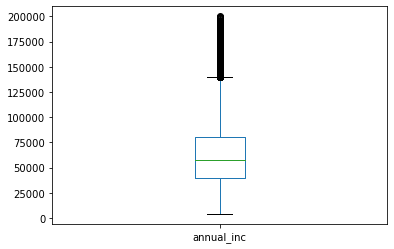

In [1078]:
loan[loan.annual_inc < 200000].annual_inc.plot.box()

In [1079]:
loan = loan[loan.annual_inc < 200000]

In [1080]:
loan.shape

(37888, 42)

# Univariate analysis

In [1081]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

##### distribution of interest rates

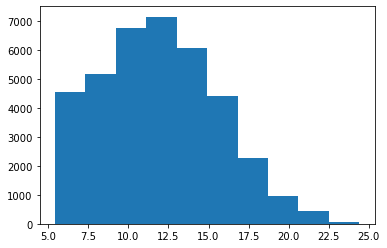

In [1082]:
plt.hist(loan.int_rate)
plt.show()

In [1083]:
import warnings
warnings.filterwarnings('ignore')

In [1084]:
import seaborn as sns

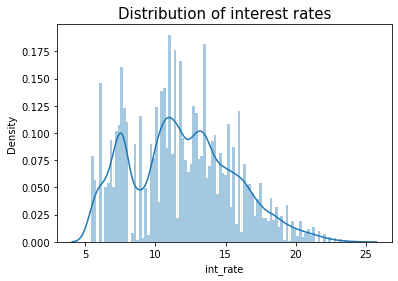

In [1085]:
sns.distplot(loan.int_rate, bins=100)
plt.title("Distribution of interest rates", fontsize=15)
plt.show()

In [1086]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

##### distribution of loan_amnt, funded_amnt and funded_amnt_inv

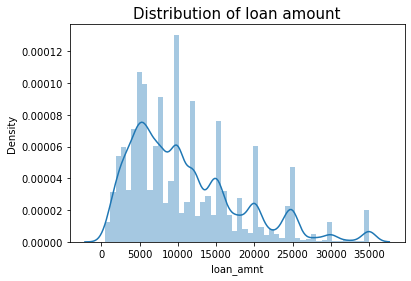

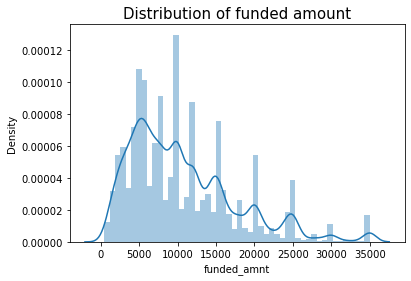

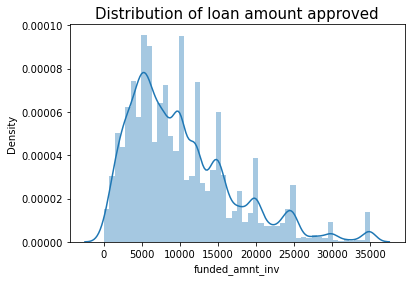

In [1087]:
sns.distplot(loan.loan_amnt)
plt.title("Distribution of loan amount", fontsize=15)
plt.show()

sns.distplot(loan.funded_amnt)
plt.title("Distribution of funded amount", fontsize=15)
plt.show()

sns.distplot(loan.funded_amnt_inv)
plt.title("Distribution of loan amount approved", fontsize=15)
plt.show()

##### analysing the fully paid and charged off records

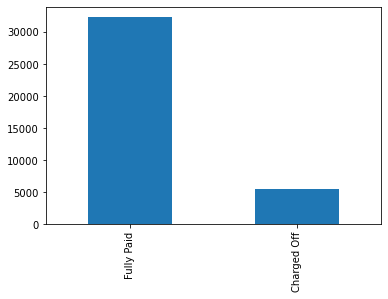

In [1088]:
loan.loan_status.value_counts().plot.bar()
plt.show()

# Bivariate analysis

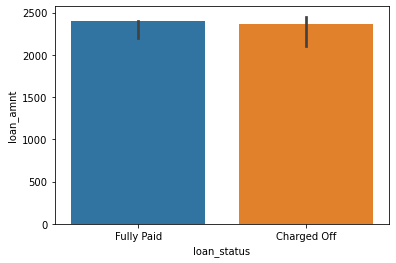

In [1089]:
sns.barplot(data=loan, x='loan_status', y='loan_amnt', estimator=lambda x: np.quantile(x,0.05))
plt.show()

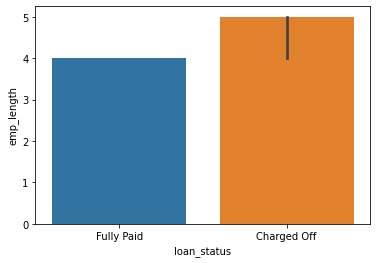

In [1091]:
sns.barplot(data=loan, x='loan_status', y='emp_length', estimator=np.median)
plt.show()

In [1092]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month'],
      dtype='object')

##### below graph shows most of the customer who fully pays there customer have 10+ years employment

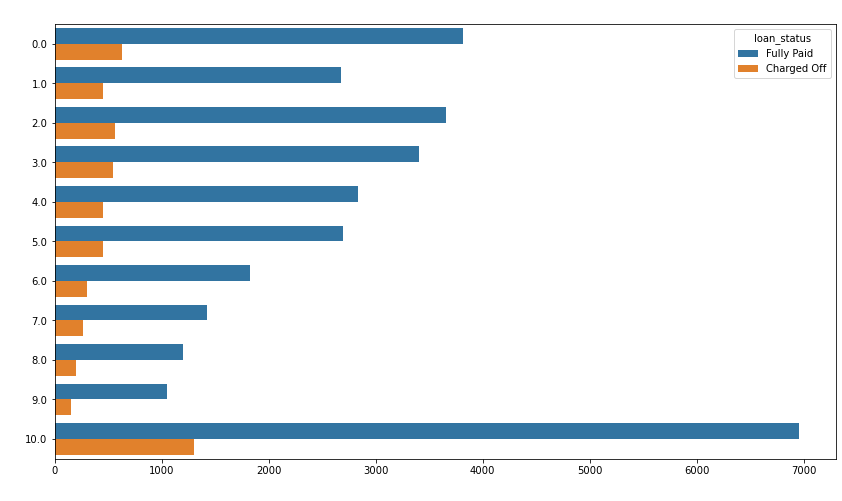

In [1093]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="emp_length",data=loan,hue='loan_status')
ax.set_title('Employment length',fontsize=14,color='w')
ax.set_ylabel('Employment length',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

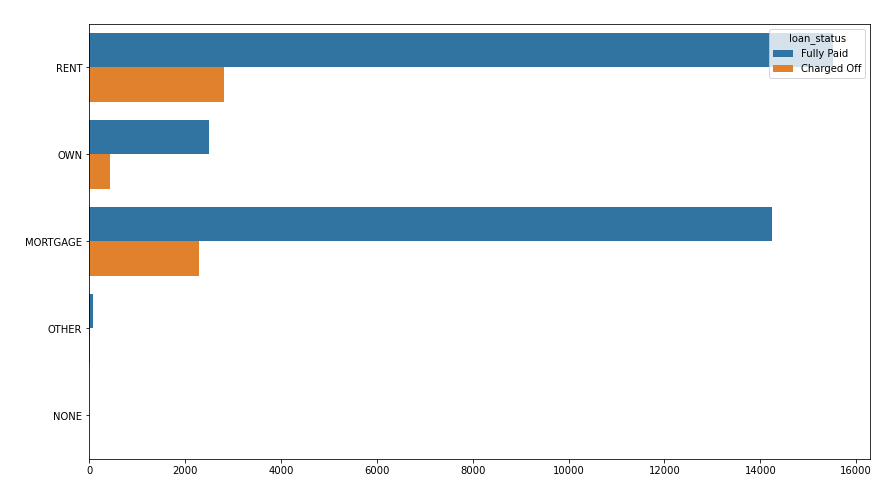

In [1094]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="home_ownership",data=loan,hue='loan_status')
ax.set_title('Home ownership',fontsize=14,color='w')
ax.set_ylabel('Home ownership',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### below graph shows most of the loans were taken for debt consolidation and to pay credit card bills

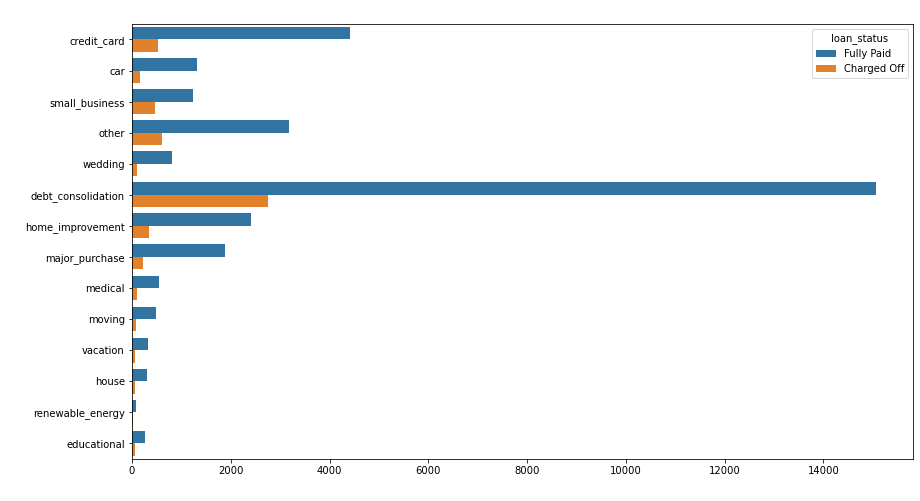

In [1095]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="purpose",data=loan,hue='loan_status')
ax.set_title('Purpose Of Loan',fontsize=14,color='w')
ax.set_ylabel('Purpose Of Loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

##### below graph shows most of the loans were taken for 36 months period

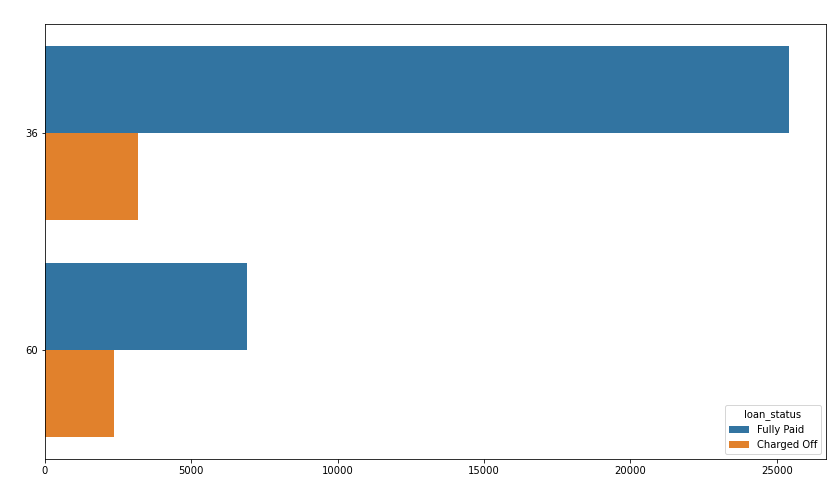

In [1127]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="term",data=loan,hue='loan_status')
ax.set_title('Duration of loan',fontsize=14,color='w')
ax.set_ylabel('Duration of loan',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

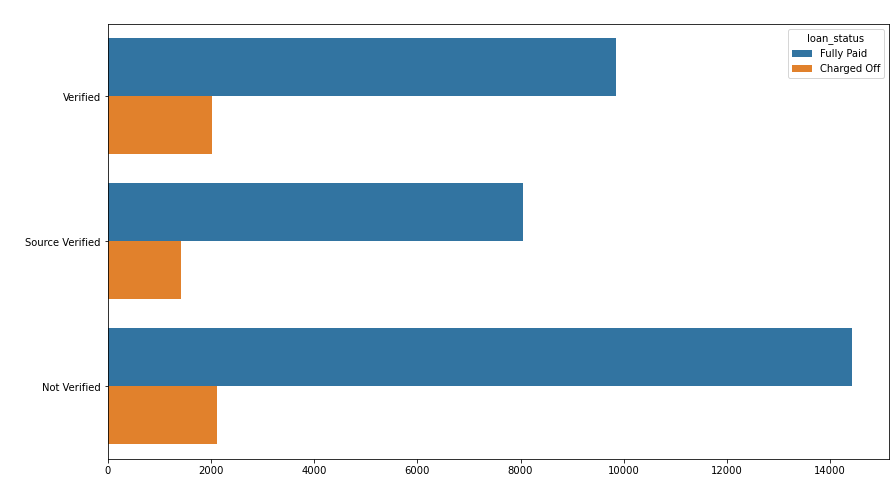

In [1128]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="verification_status",data=loan,hue='loan_status')
ax.set_title('verification_status',fontsize=14,color='w')
ax.set_ylabel('verification_status',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

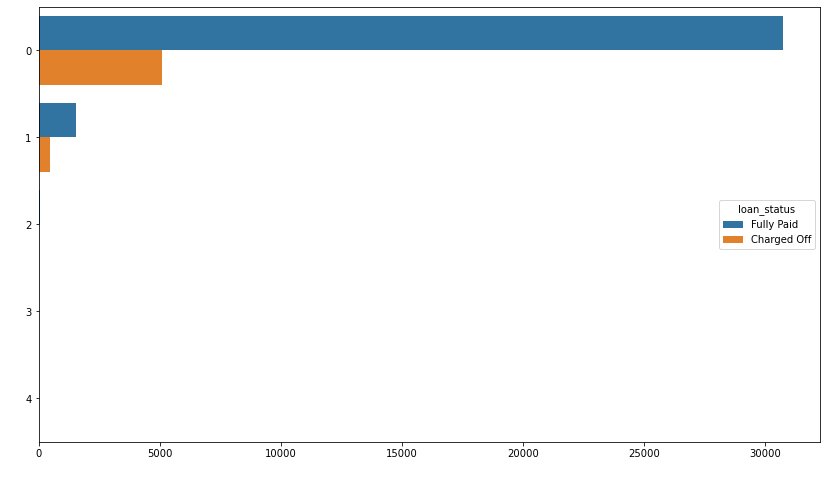

In [1129]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="pub_rec",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

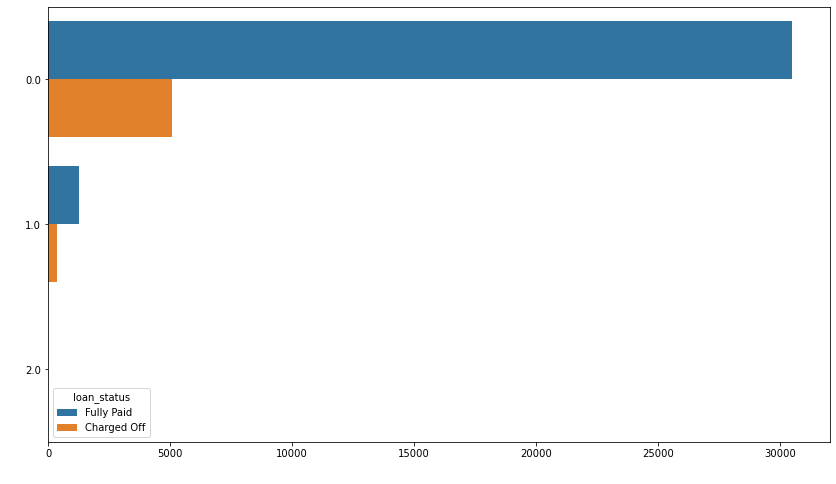

In [1130]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="pub_rec_bankruptcies",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec_bankruptcies',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

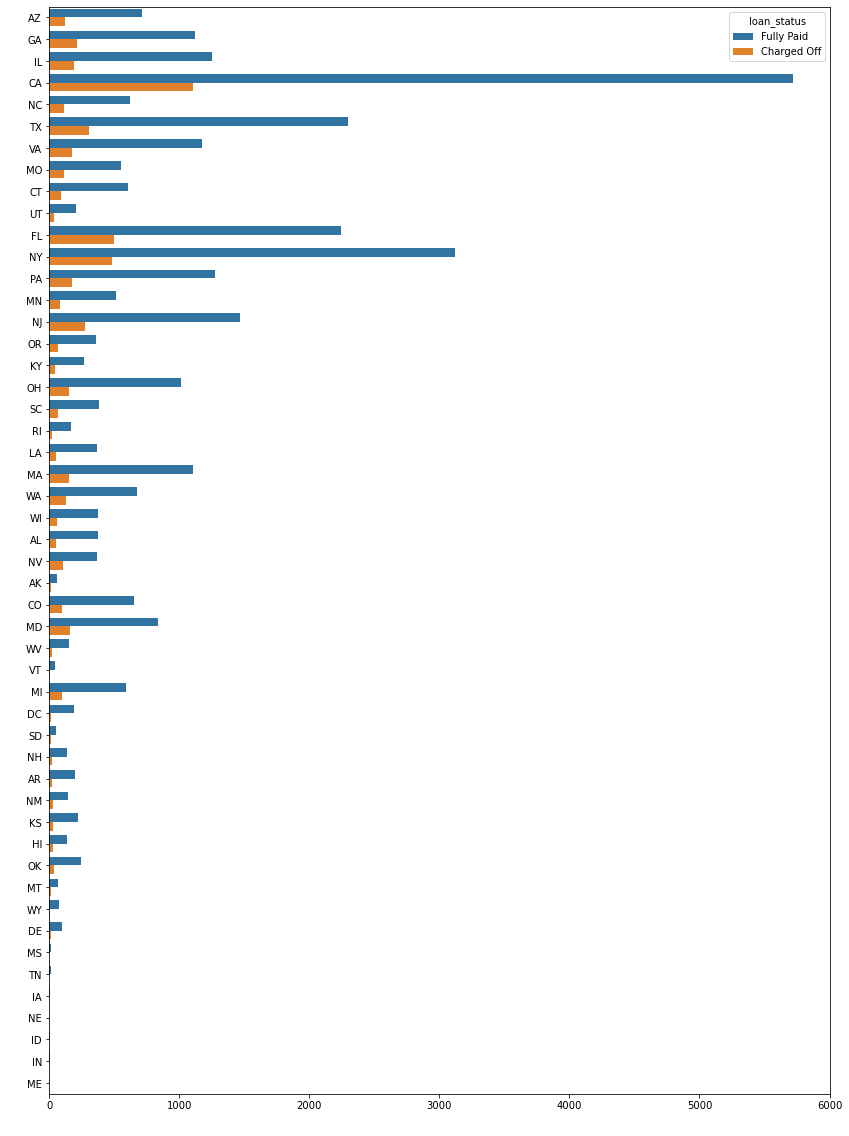

In [1174]:
plt.figure(figsize=(14,20))
ax = sns.countplot(y="addr_state",data=loan,hue='loan_status')
ax.set_ylabel('addr_state',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

# Segmentation

In [1132]:
loan.loan_amnt.max()

35000

In [1133]:
loan['loan_amnt_cat'] =  loan.loan_amnt.apply(lambda x: '0-5000' if x <= 5000 
                     else ('5000-10000' if x > 5000 and x <= 10000 
                           else ('10000-15000' if x > 10000 and x <= 15000 
                                 else ('15000-20000' if x > 15000 and x <= 20000 
                                       else ('20000-25000' if x > 20000 and x <= 25000 
                                             else ('25000-30000' if x > 25000 and x <= 30000 
                                                   else '30000-35000'))))))

In [1134]:
loan.loan_amnt_cat.unique()

array(['0-5000', '5000-10000', '10000-15000', '20000-25000',
       '30000-35000', '25000-30000', '15000-20000'], dtype=object)

In [1135]:
loan.loan_amnt.describe()

count    37888.000000
mean     10902.729756
std       7223.887442
min        500.000000
25%       5125.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [1136]:
loan[loan.loan_amnt_cat =='15000-20000'][['loan_amnt','loan_amnt_cat']]

,loan_amnt,loan_amnt_cat
56,16000,15000-20000
61,17500,15000-20000
62,17675,15000-20000
67,16425,15000-20000
79,18000,15000-20000
...,...,...
39639,17000,15000-20000
39653,20000,15000-20000
39654,18500,15000-20000
39666,15450,15000-20000


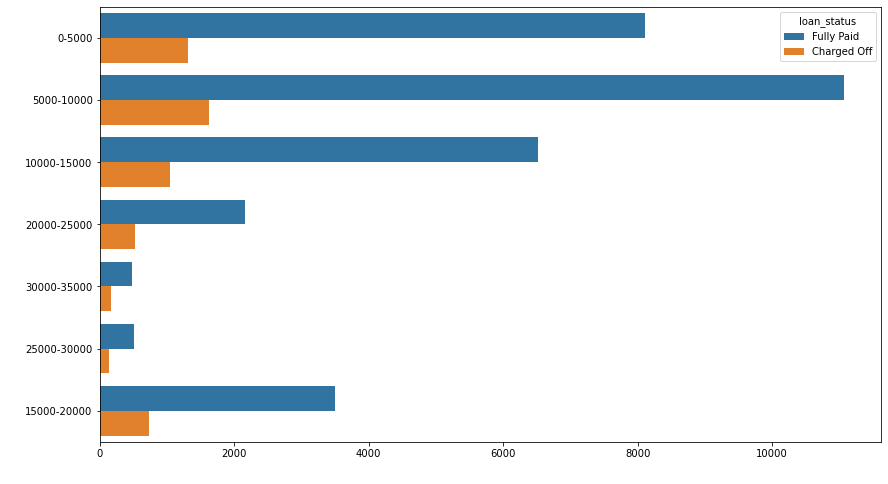

In [1137]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="loan_amnt_cat",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec_bankruptcies',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [1138]:
loan.int_rate.describe()

count    37888.000000
mean        11.909822
std          3.682251
min          5.420000
25%          8.940000
50%         11.710000
75%         14.350000
max         24.400000
Name: int_rate, dtype: float64

In [1139]:
 loan['int_rate_cat'] = loan.int_rate.apply(lambda x: '5-10' if x > 5 and x <= 10
                     else ('10-15' if x > 10 and x <= 15 
                           else ('15-20' if x > 15 and x <= 20 
                                 else '20-25' )))


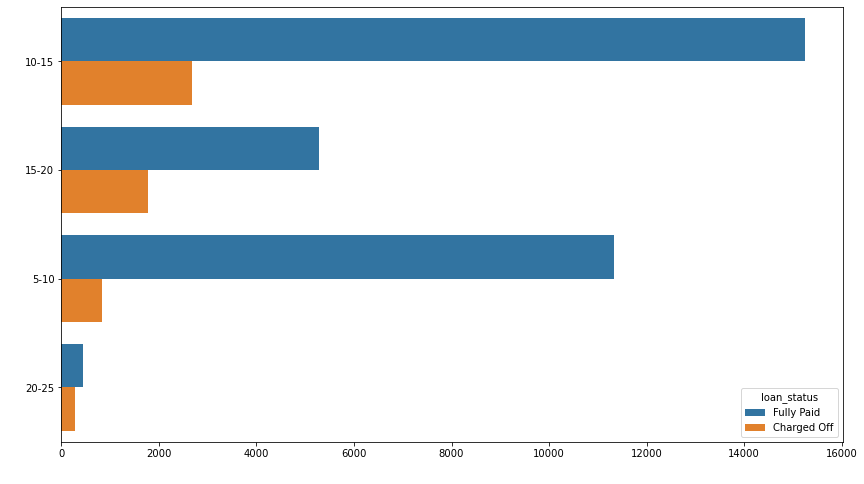

In [1140]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="int_rate_cat",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec_bankruptcies',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [1141]:
 loan.int_rate_cat.unique()

array(['10-15', '15-20', '5-10', '20-25'], dtype=object)

In [1142]:
loan[loan.int_rate_cat == '15-20'][['int_rate_cat','int_rate']]

,int_rate_cat,int_rate
1,15-20,15.27
2,15-20,15.96
6,15-20,15.96
7,15-20,18.64
15,15-20,16.29
...,...,...
39631,15-20,15.65
39640,15-20,15.01
39654,15-20,15.33
39656,15-20,15.33


In [1143]:
loan[(loan.int_rate_cat == '15-20') & (loan.int_rate > 20) ][['int_rate_cat','int_rate']]

,int_rate_cat,int_rate


In [1144]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'int_rate_cat',
       'dti_cat', 'annual_inc_cat', 'loan_amnt_cat'],
      dtype='object')

In [1145]:
loan.dti.describe()

count    37888.000000
mean        13.359724
std          6.658577
min          0.000000
25%          8.240000
50%         13.470000
75%         18.622500
max         29.990000
Name: dti, dtype: float64

In [1146]:
 loan['dti_cat'] = loan.dti.apply(lambda x: '0-5' if x <= 5
                     else ('5-10' if x > 5 and x <= 10 
                         else ('10-15' if x > 10 and x <= 15 
                               else ('15-20' if x > 15 and x <= 20 
                                     else ('20-25' if x > 20 and x <= 25 
                                         else '25-30' )))))

In [1147]:
 loan.dti_cat.unique()

array(['25-30', '0-5', '5-10', '15-20', '10-15', '20-25'], dtype=object)

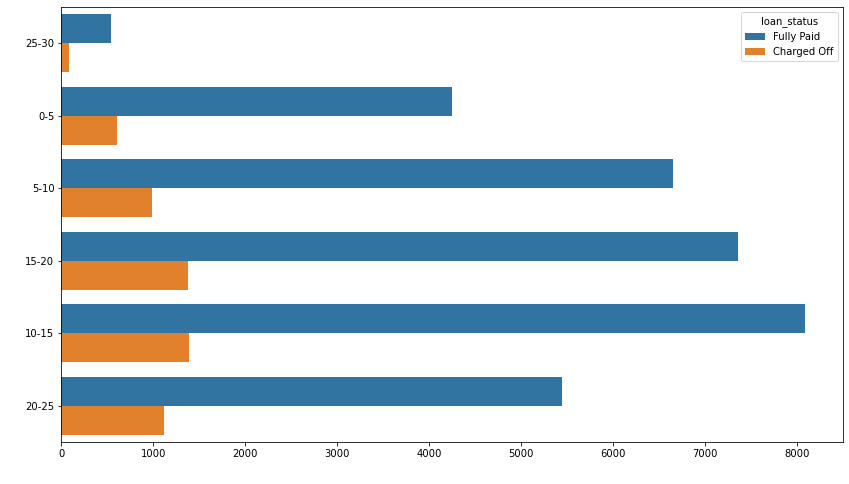

In [1148]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="dti_cat",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec_bankruptcies',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [1149]:
loan.annual_inc.describe()

count     37888.000000
mean      64157.788295
std       32803.167663
min        4000.000000
25%       40000.000000
50%       57855.000000
75%       80000.000000
max      199992.000000
Name: annual_inc, dtype: float64

In [1150]:
loan['annual_inc_cat'] =  loan.annual_inc.apply(lambda x: '0-50000' if x <= 50000 
                     else ('50000-100000' if x > 50000 and x <= 100000 
                           else ('100000-150000' if x > 100000 and x <= 150000 
                                 else '150000-200000' )))

In [1151]:
loan.annual_inc_cat.unique()

array(['0-50000', '50000-100000', '100000-150000', '150000-200000'],
      dtype=object)

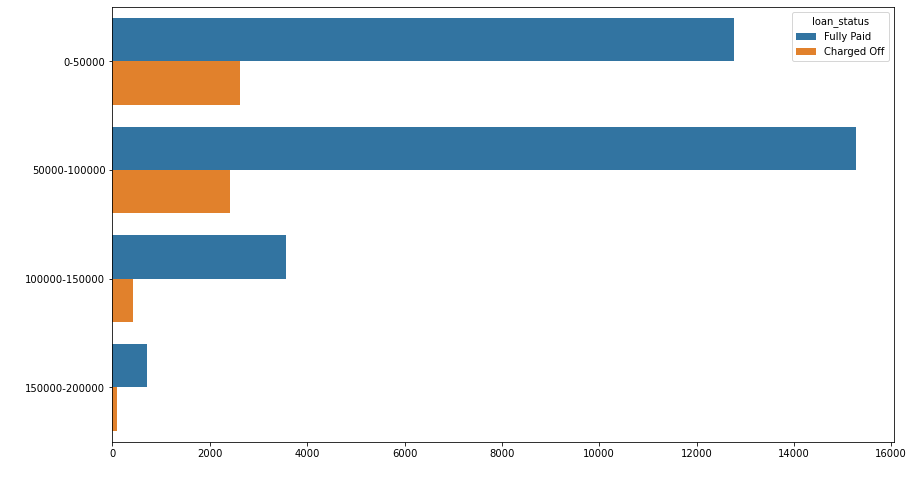

In [1152]:
plt.figure(figsize=(14,8))
ax = sns.countplot(y="annual_inc_cat",data=loan,hue='loan_status')
ax.set_ylabel('pub_rec_bankruptcies',fontsize=14,color = 'w')
ax.set_xlabel('Loan Application Count',fontsize=14,color = 'w')      
plt.show()

In [1153]:
loan.groupby(['annual_inc_cat', 'loan_status']).loan_status.count().unstack().reset_index()



loan_status,annual_inc_cat,Charged Off,Fully Paid
0,0-50000,2613,12776
1,100000-150000,429,3566
2,150000-200000,92,705
3,50000-100000,2422,15285


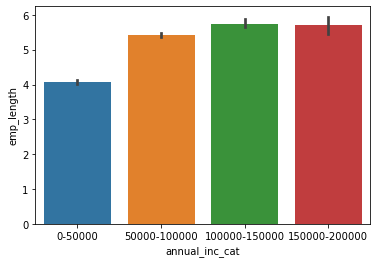

In [1154]:
sns.barplot(data=loan, x='annual_inc_cat', y='emp_length')
plt.show()

In [1155]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'int_rate_cat',
       'dti_cat', 'annual_inc_cat', 'loan_amnt_cat'],
      dtype='object')

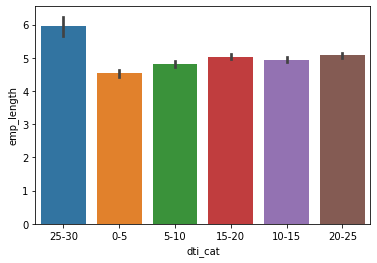

In [1156]:
sns.barplot(data=loan, x='dti_cat', y='emp_length')
plt.show()

In [1157]:
loan.dtypes

id                           int64
member_id                    int64
loan_amnt                    int64
funded_amnt                  int64
funded_amnt_inv            float64
term                         int32
int_rate                   float64
installment                float64
grade                        int64
sub_grade                   object
emp_length                 float64
home_ownership              object
annual_inc                 float64
verification_status         object
issue_d                     object
loan_status                 object
purpose                     object
addr_state                  object
dti                        float64
delinq_2yrs                  int64
earliest_cr_line            object
inq_last_6mths               int64
open_acc                     int64
pub_rec                      int64
revol_bal                    int64
revol_util                  object
total_acc                    int64
out_prncp                  float64
out_prncp_inv       

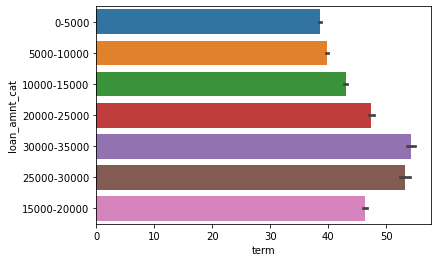

In [1158]:
sns.barplot(data=loan, x='term', y='loan_amnt_cat')
plt.show()

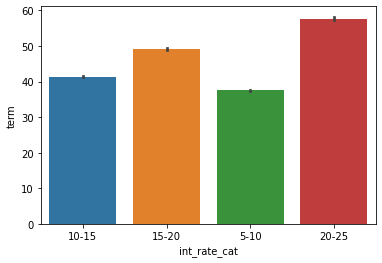

In [1159]:
sns.barplot(data=loan, y='term', x='int_rate_cat')
plt.show()

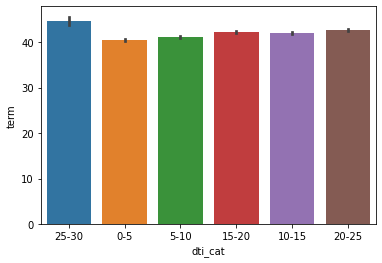

In [1160]:
sns.barplot(data=loan, y='term', x='dti_cat')
plt.show()

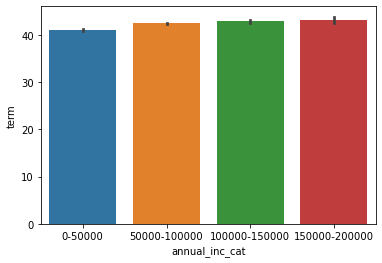

In [1161]:
sns.barplot(data=loan, y='term', x='annual_inc_cat')
plt.show()

In [1162]:
res = pd.pivot_table(data=loan, index="annual_inc_cat", columns='loan_amnt_cat',
               values='int_rate', aggfunc=lambda x: np.quantile(x,0.2))
               

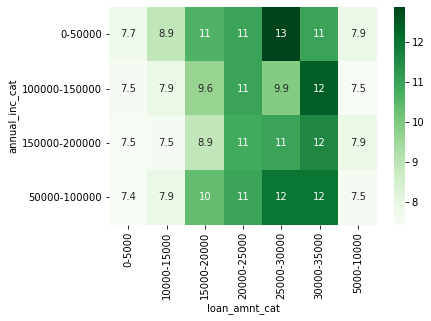

In [1163]:
sns.heatmap(res, cmap = 'Greens', annot=True)
plt.show()

In [1164]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'loan_status', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'out_prncp_inv',
       'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d',
       'pub_rec_bankruptcies', 'issue_year', 'issue_month', 'int_rate_cat',
       'dti_cat', 'annual_inc_cat', 'loan_amnt_cat'],
      dtype='object')

In [1165]:
loan[['issue_d','last_pymnt_amnt','last_pymnt_d','last_credit_pull_d','pub_rec_bankruptcies']]


,issue_d,last_pymnt_amnt,last_pymnt_d,last_credit_pull_d,pub_rec_bankruptcies
0,Dec-11,171.62,Jan-15,May-16,0.0
1,Dec-11,119.66,Apr-13,Sep-13,0.0
2,Dec-11,649.91,Jun-14,May-16,0.0
3,Dec-11,357.48,Jan-15,Apr-16,0.0
5,Dec-11,161.03,Jan-15,Jan-16,0.0
...,...,...,...,...,...
39711,Jul-07,159.83,Jul-10,Nov-14,NaN
39712,Jul-07,80.90,Jul-10,Jun-10,NaN
39713,Jul-07,281.94,Jul-10,Jul-10,NaN
39714,Jul-07,0.00,Apr-08,Jun-07,NaN


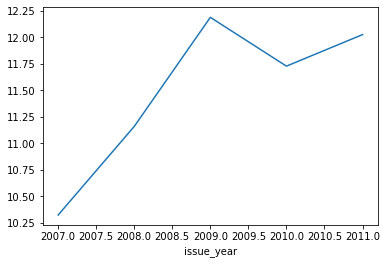

In [1166]:
loan.groupby(['issue_year'])['int_rate'].mean().plot()
plt.show()

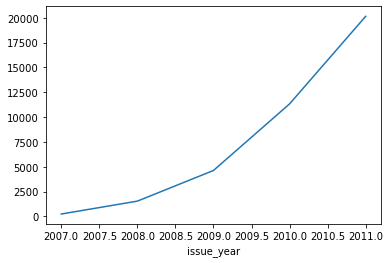

In [1167]:
loan.groupby(['issue_year']).id.count().plot()
plt.show()

In [1168]:
pd.pivot_table(data=loan, index="annual_inc_cat", columns='issue_year',
               values='int_rate', aggfunc=lambda x: np.quantile(x,0.2))

issue_year,2007,2008,2009,2010,2011
annual_inc_cat,,,,,
0-50000,8.70,9.200,9.32,7.880,7.51
100000-150000,7.43,9.630,9.32,7.880,7.90
150000-200000,8.07,9.424,11.14,9.776,7.90
50000-100000,8.38,9.510,9.32,7.880,7.66


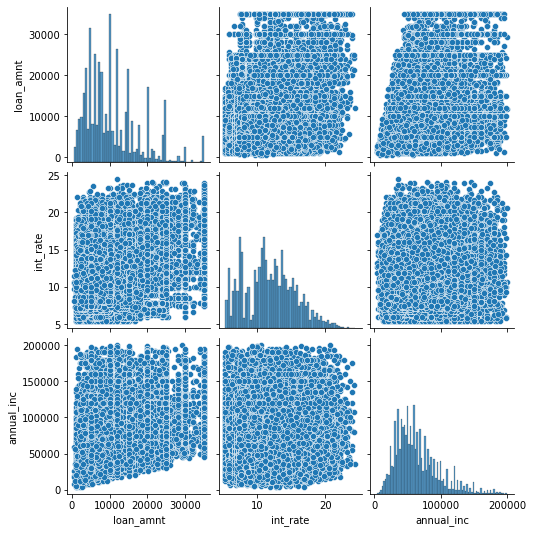

In [1169]:
sns.pairplot(loan[['loan_amnt','int_rate','annual_inc','loan_status']])
plt.show()